### <div align=center> Handling Missing Data <div>
<hr>

##  What is a Missing Value?
- A **missing value** refers to the absence of a data point in the dataset.  
- In real-world machine learning projects, datasets are rarely perfect and often contain missing values.  
- Missing values are problematic because:
  - Most ML algorithms **cannot handle them directly**.
  - They can lead to **biased analysis** if not treated properly.
  - They reduce the **statistical power** of the dataset.

Example:  
If a dataset has a column `Age` and some rows do not contain any value for age, then those are **missing values**.

---

#  Causes of Missing Data in Datasets

In real-world datasets, missing values can arise from multiple sources. Understanding these causes helps in identifying patterns of missingness and deciding how to handle them.

---

## 1. Data Collection Issues
- **Description:** Missing data occurs due to errors or failures in the data collection process.  
- **Example:** A weather prediction model relies on sensors across the country. If a sensor malfunctions due to extreme weather conditions, temperature and humidity data from that location may be missing, creating gaps in the dataset.

---

## 2. Data Entry Errors
- **Description:** Human mistakes while entering data can introduce missing values.  
- **Example:** In a health outcome dataset, a clerk types "NA" instead of "0" for "number of cigarettes smoked per day" by a non-smoker. This typo creates missing values in a key predictive variable.

---

## 3. Privacy Concerns
- **Description:** Individuals may opt out of sharing sensitive information, leading to systematically missing data.  
- **Example:** In a credit score dataset, "previous loan amounts" might be missing because some users chose not to share this information.

---

## 4. Data Processing and Cleaning
- **Description:** Cleaning steps like removing outliers or erroneous data can inadvertently remove valid observations with missing related information.  
- **Example:** In a real estate price prediction dataset, extreme house sizes are removed as outliers. If these houses were missing price information, their removal results in loss of relevant data for high-end property predictions.

---

## 5. Integration from Multiple Sources
- **Description:** Combining datasets from different sources can introduce missing values if certain variables were not collected by all sources.  
- **Example:** Merging hospital records from different systems to predict patient readmission rates may leave missing data for conditions not recorded in some hospitals.

---

## 6. Evolution of Data Collection
- **Description:** Changes in surveys, forms, or data collection tools over time can lead to missing values in older records.  
- **Example:** A long-term health study updates its questionnaire to include e-cigarette use halfway through. Early surveys lack this information, resulting in missing values for this variable in the first part of the study.

---

## 7. Censoring
- **Description:** Some events are not observed during the study period, resulting in incomplete data.  
- **Example:** Predicting time until a machine part fails may have missing failure times for machines still operational at the end of the observation period.

---

## 8. Software Limitations
- **Description:** Bugs or limitations in data collection software can cause missing values.  
- **Example:** A social media sentiment analysis dataset misses posts with certain emojis because the scraping tool failed to record them.

---

## 9. Resource Constraints
- **Description:** Limited resources can prevent collection of all desired data, leading to missing values.  
- **Example:** In modeling the spread of a rare disease, researchers cannot perform genome sequencing on all samples due to cost, leaving genetic data missing for many cases.
   
---

##  How to Identify Missing Values
- Check for blank or empty entries in the dataset.  
- Count the number of missing values per column.  
- Calculate the percentage of missing values.  
- Use visualizations (like heatmaps) to see patterns of missingness.  

Understanding the **extent and pattern** of missing data helps in deciding the next steps.

---

##  Types of Missing Values in Data

In any dataset, missing values can appear for many reasons — data collection errors, privacy concerns, skipped responses, or technical glitches.  
To handle them properly, we first need to understand **why** the data is missing.

---

###  Observed vs Unobserved Data

- **Observed Data:**  
  Information that is present and recorded in the dataset.  
  *Example:* If a person’s age and gender are known, those are observed values.

- **Unobserved Data:**  
  Information that exists in reality but is **not recorded** or **not visible** in the dataset.  
  *Example:* If the person didn’t report their income, that missing income value is unobserved.

---

##  1. MCAR — Missing Completely at Random

**Definition:**  
The probability of a value being missing is **completely independent** of both the observed and unobserved data.

**Intuition:**  
Nothing in the data explains why it’s missing — it’s purely random.

**Examples:**
- A temperature sensor fails occasionally due to random electrical faults.  
- A survey form gets lost in the mail.  
- A researcher accidentally deletes a few random entries.  
- A website log entry fails to record due to random server timeout.

**Impact:**  
- No systematic bias — missingness is random.  
- Analyses remain valid if missing rows are removed.

**Common Handling Techniques:**
- Deletion of missing rows/columns (if few)  
- Simple imputation (mean, median, mode)

---

##  2. MAR — Missing at Random

**Definition:**  
The probability of missingness depends **only on observed data**, not on the value that is missing itself.

**Intuition:**  
We can *explain* the missingness pattern using other variables that are present in the dataset.

**Examples:**
- High-income people are less likely to report their *age* (missingness in age depends on income, which is observed).  
- Students with lower attendance are more likely to skip answering survey questions.  
- Hospital patients with longer stays tend to have more incomplete billing info.  
- In an e-commerce dataset, expensive items are more likely to have missing discount values.

**Impact:**  
- Some bias possible, but can be handled statistically.  
- Advanced imputation can give reliable results.

**Common Handling Techniques:**
- Regression imputation  
- K-Nearest Neighbors (KNN) imputation  
- Multiple imputation (MICE)  
- Model-based imputation using observed predictors

---

##  3. MNAR — Missing Not at Random

**Definition:**  
The probability of missingness depends **on the missing value itself** or on some **unobserved factor**.

**Intuition:**  
The missingness pattern is related to the actual (unseen) value, making it hardest to deal with.

**Examples:**
- People with **very low income** choose not to report their income.  
- Patients with **severe illness** do not return for follow-up surveys.  
- Students who **performed poorly** skip entering their exam marks.  
- Customers who gave **negative feedback** leave the comment field blank.

**Impact:**  
- Strong bias — missingness hides true patterns.  
- Statistical methods often fail without assumptions or external information.

**Common Handling Techniques:**
- Use **domain expertise** to model missingness mechanism.  
- **Expectation–Maximization (EM)** algorithms.  
- Sensitivity analysis or data augmentation.

---

###  Summary Table

| Type | Depends On | Typical Examples | Bias Risk | Common Handling |
|------|-------------|------------------|------------|-----------------|
| **MCAR** | Nothing | Random sensor failure, deleted entries |  None | Delete / Simple imputation |
| **MAR** | Observed data | Missing age depends on income, incomplete billing |  Moderate | Model-based imputation |
| **MNAR** | Missing data itself | Low-income unreported, sick patients skip survey |  High | EM, domain-based modeling |

---

- Missing values are **unavoidable** in real-world datasets.  
- They can occur due to **human error, system failure, survey non-response, corruption, or inapplicability**.  
- Identifying missing values and understanding **their type (MCAR, MAR, MNAR)** is the **first step** before applying any treatment.  

---

#  Impact of Missing Values on Machine Learning Models

Missing values in datasets can significantly affect the performance and reliability of machine learning models. Their impact can be summarized as follows:

---

## 1. Training Difficulties
- Many ML algorithms require **complete cases** (rows without missing values) to function correctly.  
- Missing values can **complicate the training process**, requiring additional preprocessing steps such as imputation or using models that can handle missing data explicitly.

---

## 2. Increased Complexity
- Handling missing data often involves **extra coding and preprocessing**.  
- Strategies like mean/median imputation, predictive imputation, or using indicator variables increase the complexity of data preparation.  
- More complex pipelines also **increase the risk of errors**.

---

## 3. Bias
- Imputing missing values using incorrect assumptions can **introduce bias**.  
- Example: Filling missing ages with the mean age may distort the relationship between age and the target variable, leading to **skewed model predictions**.

---

## 4. Interpretation Issues
- Using incorrect or arbitrary values to fill missing data can result in **misleading interpretations** of the dataset.  
- Analysts may draw wrong conclusions about feature importance or relationships between variables.

---


### Finding and Visualizing Missing Values

In [7]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Check for missing values in each column
missing_values_count = df.isnull().sum()

# Print the number of missing values for each column
print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# If you want to see the percentage of missing values in each column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_values_percentage)



Percentage of missing values in each column:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [9]:
# To get a quick overview of total missing values in the dataset
total_missing_values = df.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {total_missing_values}")


Total missing values in the dataset: 866


In [10]:
# Check for any rows that have missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]
print("\nRows with missing values:")
rows_with_missing_values


Rows with missing values:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#  Missingno Library – Visualizing Missing Data

---

##  What is Missingno?
- **Missingno** is a Python library designed specifically for **visualizing missing data** in datasets.  
- Instead of just checking counts and percentages, it provides **intuitive visual representations** of missingness.  
- This makes it easier to:
  - Detect patterns of missing data.  
  - Identify correlations between missing values of different columns.  
  - Decide the best strategy for handling them.

---

##  Key Features
1. **Simple and Fast** – generates clear plots for missing data analysis.  
2. **Multiple Visualization Types** – bar charts, matrices, heatmaps, dendrograms.  
3. **Pattern Detection** – helps to see if missing values are random or systematic.  
4. **Correlation Analysis** – identifies relationships between missingness in different columns.  
5. **Integration with Pandas** – works directly with DataFrames.  

---

##  Visualizations in Missingno

### 1. **Bar Plot**
- Displays the **total count of non-missing values per column**.  
- Provides a quick overview of which columns have the most/least missing data.  
- Example insight: If one column has significantly fewer values, it may need special treatment or removal.

---

### 2. **Matrix Plot**
- Displays a **data matrix** where:
  - Each column is shown as a vertical stripe.  
  - White spaces represent missing values.  
  - Black/colored spaces represent present values.  
- Helps in spotting **patterns and sequences** of missing data across the dataset.  
- Example: You can see if missing values occur in consecutive rows or randomly.

---

### 3. **Heatmap (Correlation of Missingness)**
- Shows a **correlation matrix of missing values** between columns.  
- The correlation is based on whether missingness in one column implies missingness in another.  
- Example:
  - If `Age` is missing whenever `Salary` is missing, the heatmap will show a strong correlation.  
- Useful for understanding dependencies between features’ missing data.

---

### 4. **Dendrogram**
- Provides a **hierarchical clustering of missingness**.  
- Groups together columns that have **similar patterns of missing values**.  
- Useful to detect **clusters of features** where missing data tends to occur together.  
- Example: If `Height` and `Weight` are often missing in the same rows, they will appear in the same cluster.

---

##  Comparison Table of Missingno Visualizations

| Visualization | What it Shows | When to Use | Example Insight |
|---------------|--------------|-------------|----------------|
| **Bar Plot** | Count of non-missing values per column | First step – quick overview of missing data | Identifies which columns have the most missing values |
| **Matrix Plot** | Matrix of missing vs. non-missing entries (row-wise view) | To detect row-wise patterns in missingness | Missing values appear in specific sequences (e.g., consecutive rows) |
| **Heatmap** | Correlation of missingness between columns | To check if missingness in one feature is linked to another | If `Age` is missing, `Salary` is often missing too |
| **Dendrogram** | Hierarchical clustering of missingness patterns | To find groups of columns with similar missingness | `Height` and `Weight` are usually missing together |

---

- **Missingno** is a powerful library for visualizing missing data in an intuitive way.  
- It supports four main visualizations:  
  - **Bar Plot** → Count of non-missing values per column.  
  - **Matrix Plot** → Data matrix showing missing vs. non-missing values.  
  - **Heatmap** → Correlation of missingness between columns.  
  - **Dendrogram** → Hierarchical clustering of missingness patterns.  
- These visualizations help analysts decide whether missingness is random or systematic, which guides the choice of handling techniques.

---


In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/andymcdgeo/Andys_YouTube_Notebooks/main/Data/xeek_subset2.csv')
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,PEF,DTC,SP,DTS,DCAL,DRHO,ROPA,RXO,LITHOFACIES,LITH_CONF
0,15/09/2013,494.528,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,20.915468,161.131180,24.612379,NaN,NaN,-0.574928,NaN,NaN,65000,1.0
1,15/09/2013,494.680,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,19.383013,160.603470,23.895531,NaN,NaN,-0.570188,NaN,NaN,65000,1.0
2,15/09/2013,494.832,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,22.591518,160.173615,23.916357,NaN,NaN,-0.574245,NaN,NaN,65000,1.0
3,15/09/2013,494.984,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,32.191910,160.149429,23.793688,NaN,NaN,-0.586315,NaN,NaN,65000,1.0
4,15/09/2013,495.136,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,38.495632,160.128342,24.104078,NaN,NaN,-0.597914,NaN,NaN,65000,1.0


In [12]:
df.shape

(133198, 25)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   WELL         133198 non-null  object 
 1   DEPTH_MD     133198 non-null  float64
 2   X_LOC        125805 non-null  float64
 3   Y_LOC        125805 non-null  float64
 4   Z_LOC        125805 non-null  float64
 5   GROUP        133198 non-null  object 
 6   FORMATION    111632 non-null  object 
 7   CALI         133006 non-null  float64
 8   RSHA         62039 non-null   float64
 9   RMED         125556 non-null  float64
 10  RDEP         125805 non-null  float64
 11  RHOB         108053 non-null  float64
 12  GR           133198 non-null  float64
 13  SGR          17350 non-null   float64
 14  NPHI         91725 non-null   float64
 15  PEF          100840 non-null  float64
 16  DTC          132635 non-null  float64
 17  SP           93680 non-null   float64
 18  DTS          12184 non-n

<Axes: >

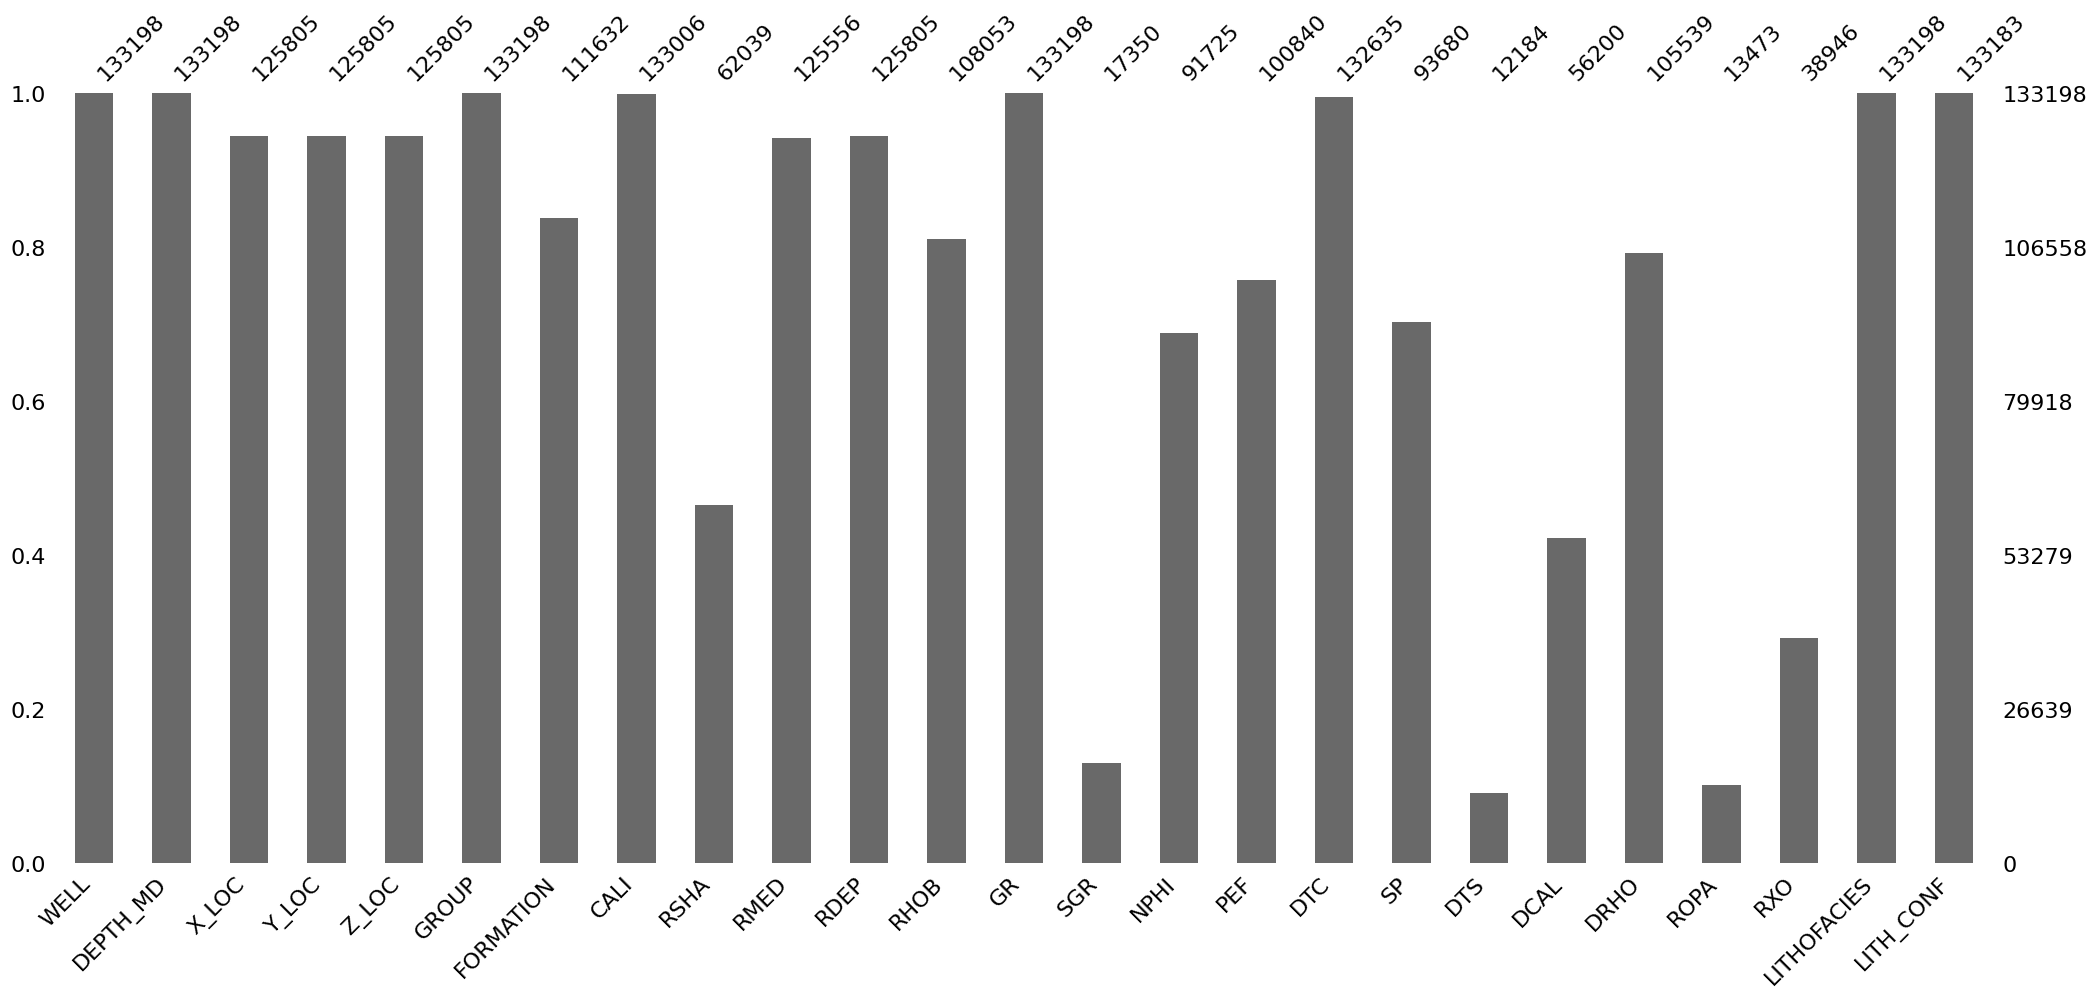

In [14]:
import missingno as msno
import matplotlib.pyplot as plt

# Bar plot to visualize missing values
msno.bar(df)


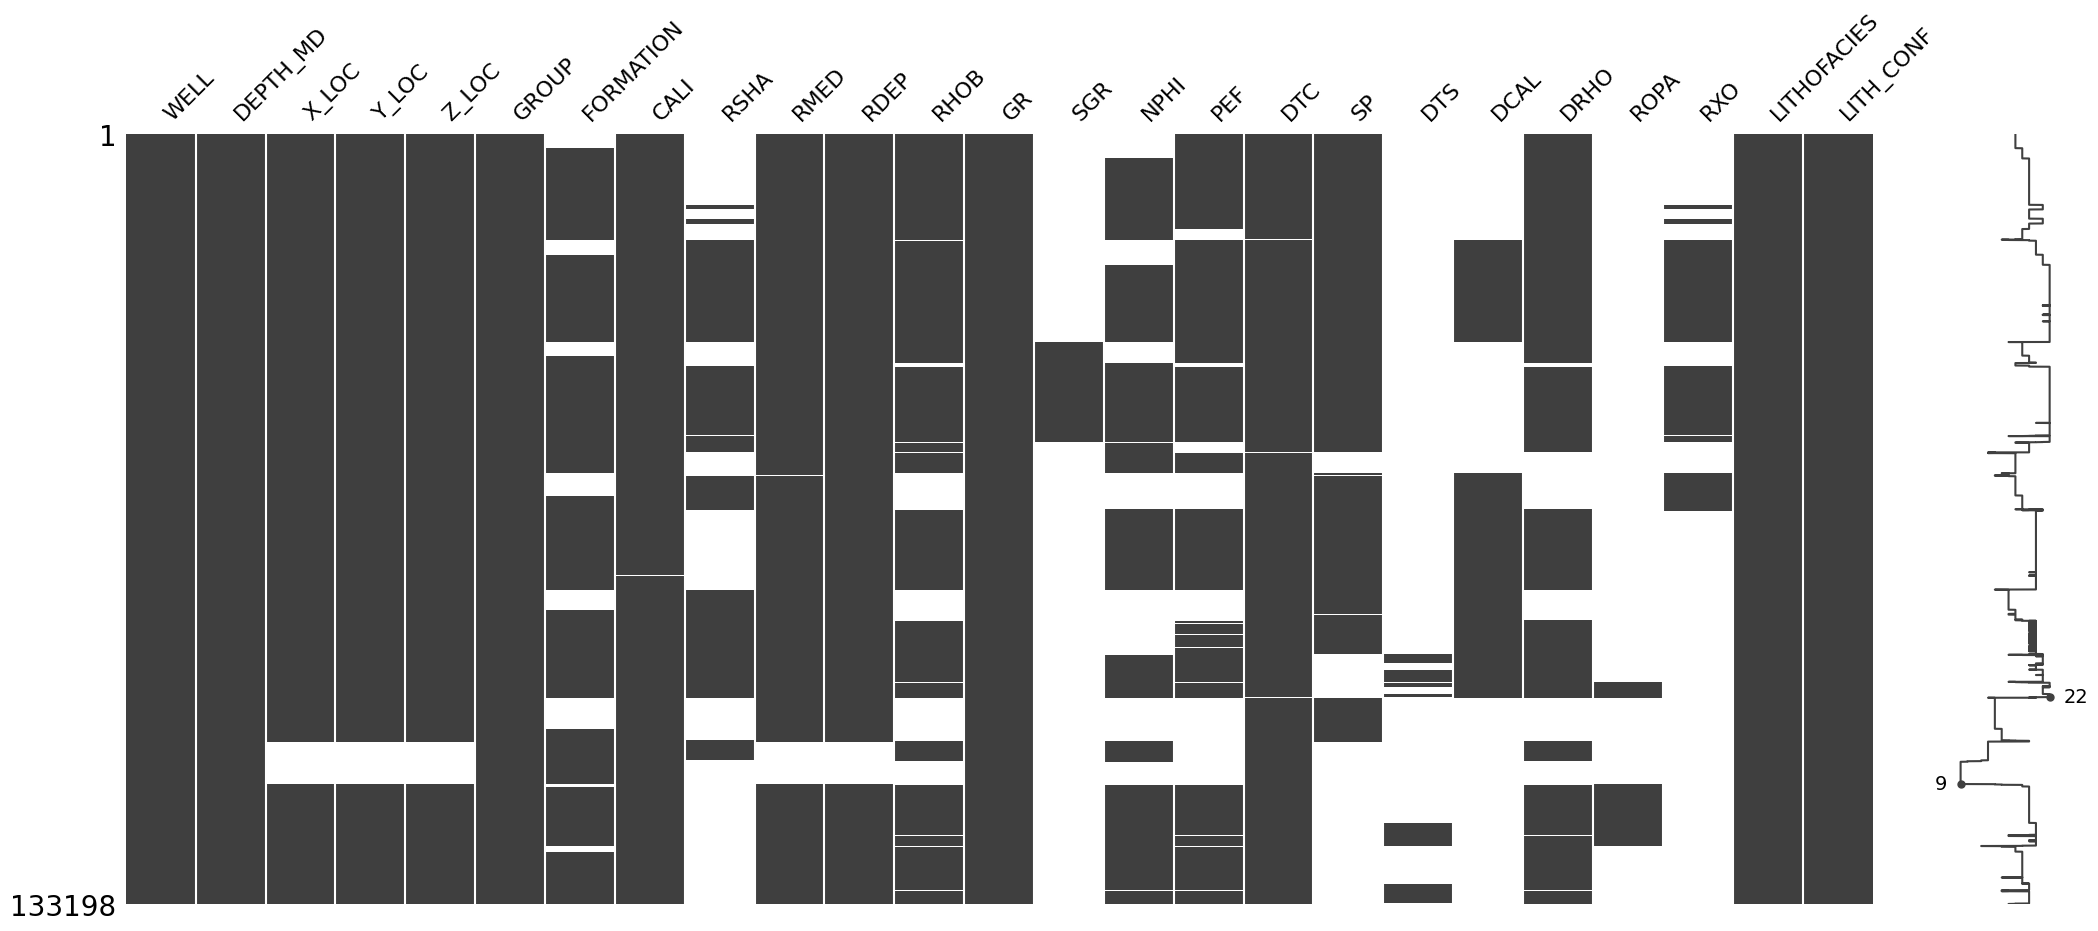

In [15]:
# Matrix chart to visualize missing values
msno.matrix(df)
plt.show()

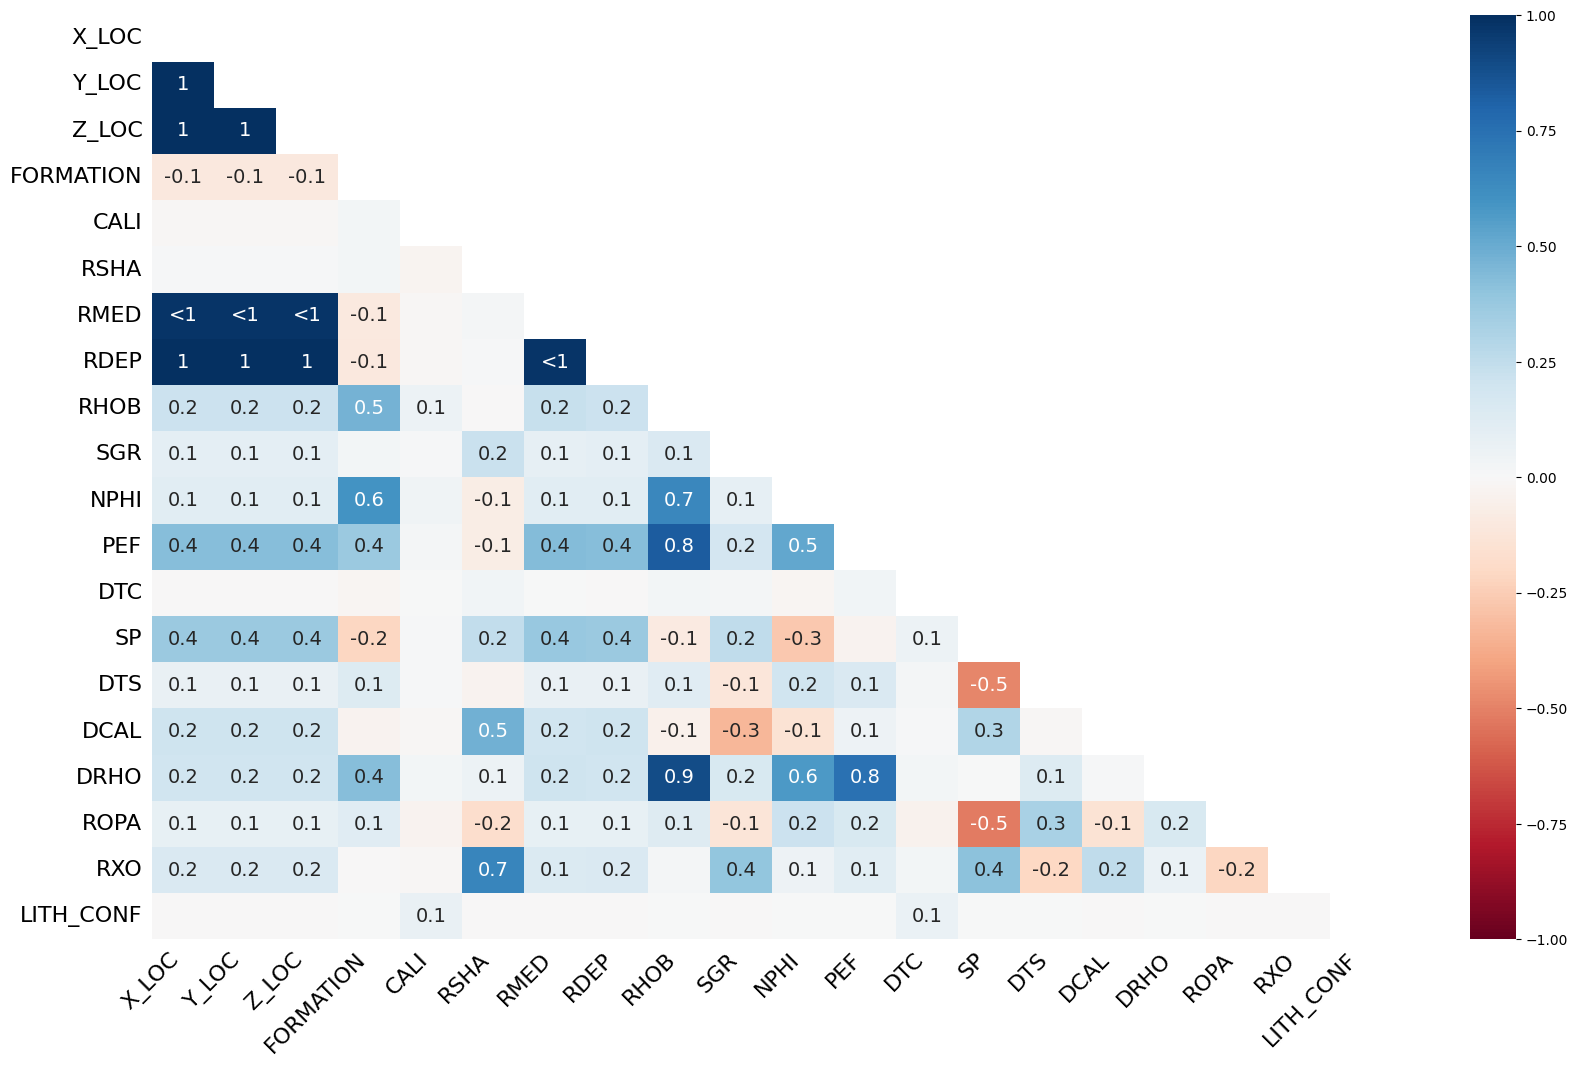

In [16]:
# Heatmap to visualize the correlation of missingness between columns
msno.heatmap(df)
plt.show()

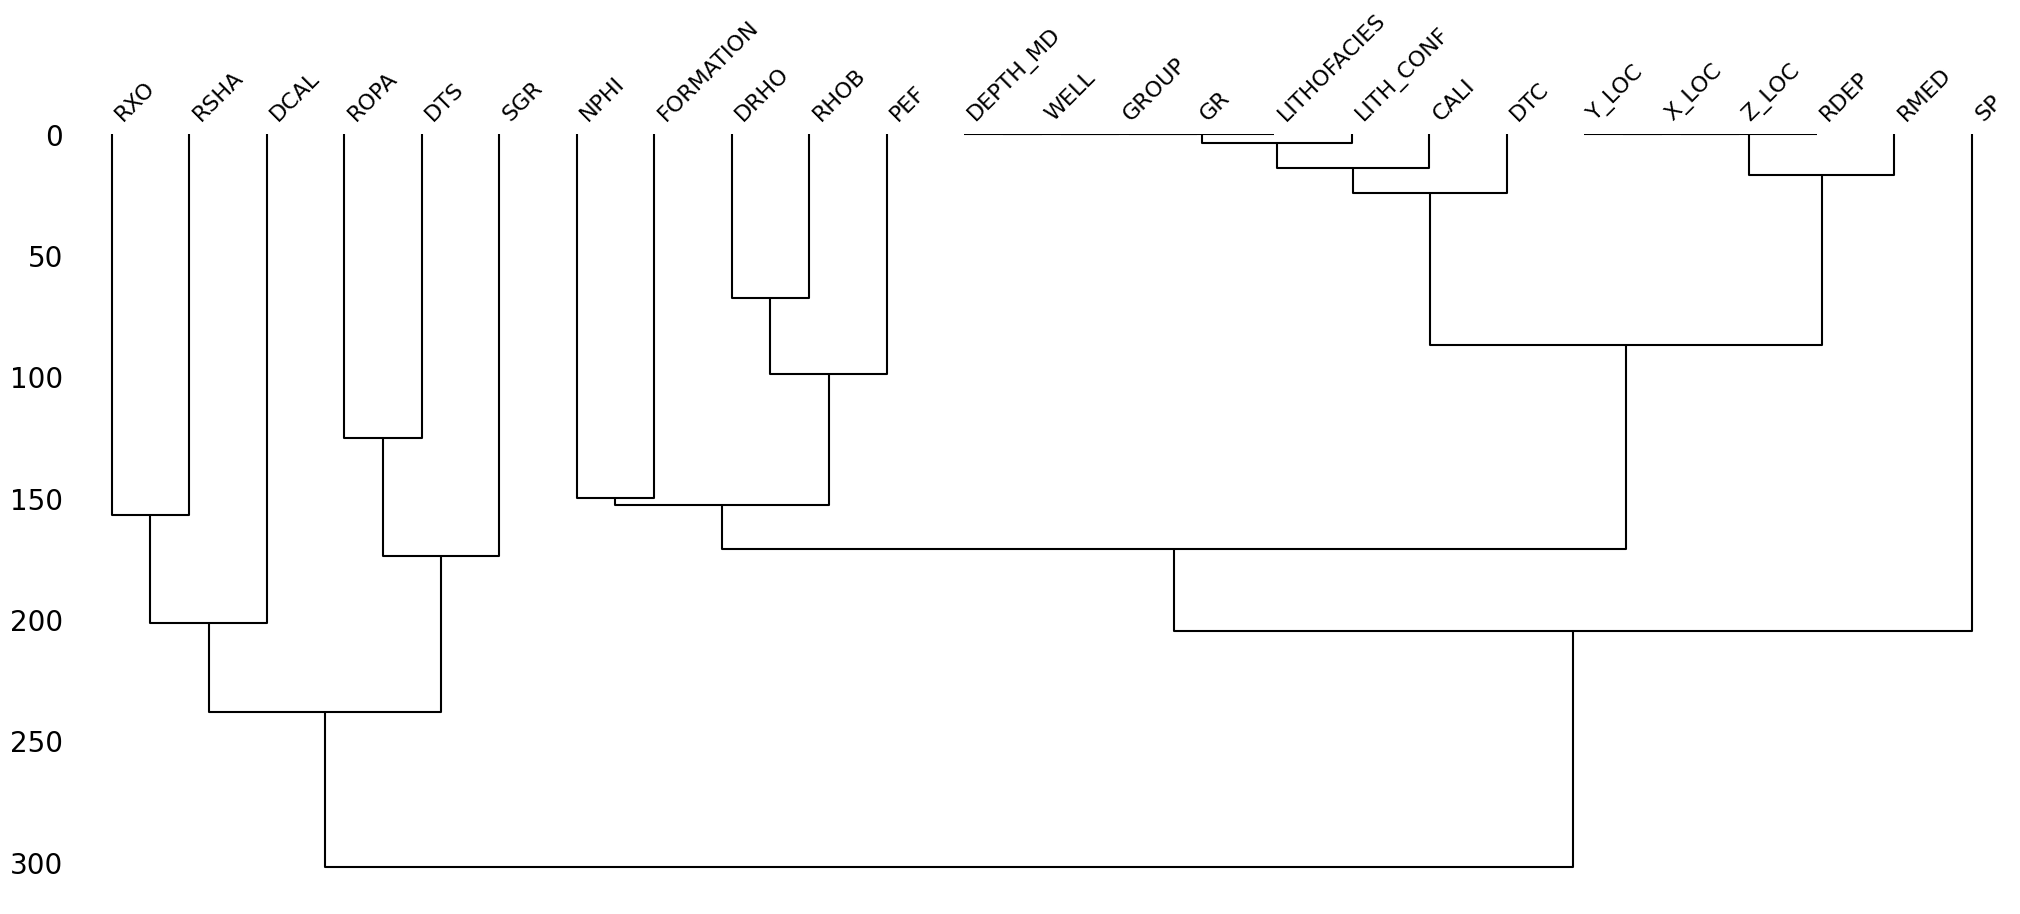

In [17]:
# Dendrogram to visualize the hierarchical clustering of missing values
msno.dendrogram(df)
plt.show()

In [18]:
import numpy as np 
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random data
data = np.random.randn(100, 3)  # 100 rows, 3 columns

# Artificially introduce missing values completely at random in the first column
missing_indices = np.random.choice(np.arange(100), size=20, replace=False)
data[missing_indices, 0] = np.nan

# Create a DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])

df.head()

,Feature1,Feature2,Feature3
0,0.496714,-0.138264,0.647689
1,1.523030,-0.234153,-0.234137
2,NaN,0.767435,-0.469474
3,0.542560,-0.463418,-0.465730
4,0.241962,-1.913280,-1.724918


In [19]:
df.isnull().sum()

Feature1    20
Feature2     0
Feature3     0
dtype: int64

In [20]:
df.shape

(100, 3)

In [21]:
# Split the data into two groups
missing_data = df[df['Feature1'].isnull()]
not_missing_data = df[~df['Feature1'].isnull()]

# Calculate the means
means_missing = missing_data.mean()
means_not_missing = not_missing_data.mean()

# Print the means for comparison
print("Means with missing data:\n", means_missing)
print("\nMeans without missing data:\n", means_not_missing)


Means with missing data:
 Feature1         NaN
Feature2   -0.464175
Feature3    0.082040
dtype: float64

Means without missing data:
 Feature1    0.058190
Feature2   -0.112998
Feature3    0.073017
dtype: float64


In [22]:
not_missing_data.shape

(80, 3)

In [23]:
import numpy as np
from scipy import stats

# Compare means of another feature 'feature2' between groups
t_stat, p_val = stats.ttest_ind(missing_data['Feature2'], not_missing_data['Feature2'], nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: -1.4425050875192738, P-value: 0.15234843927954841


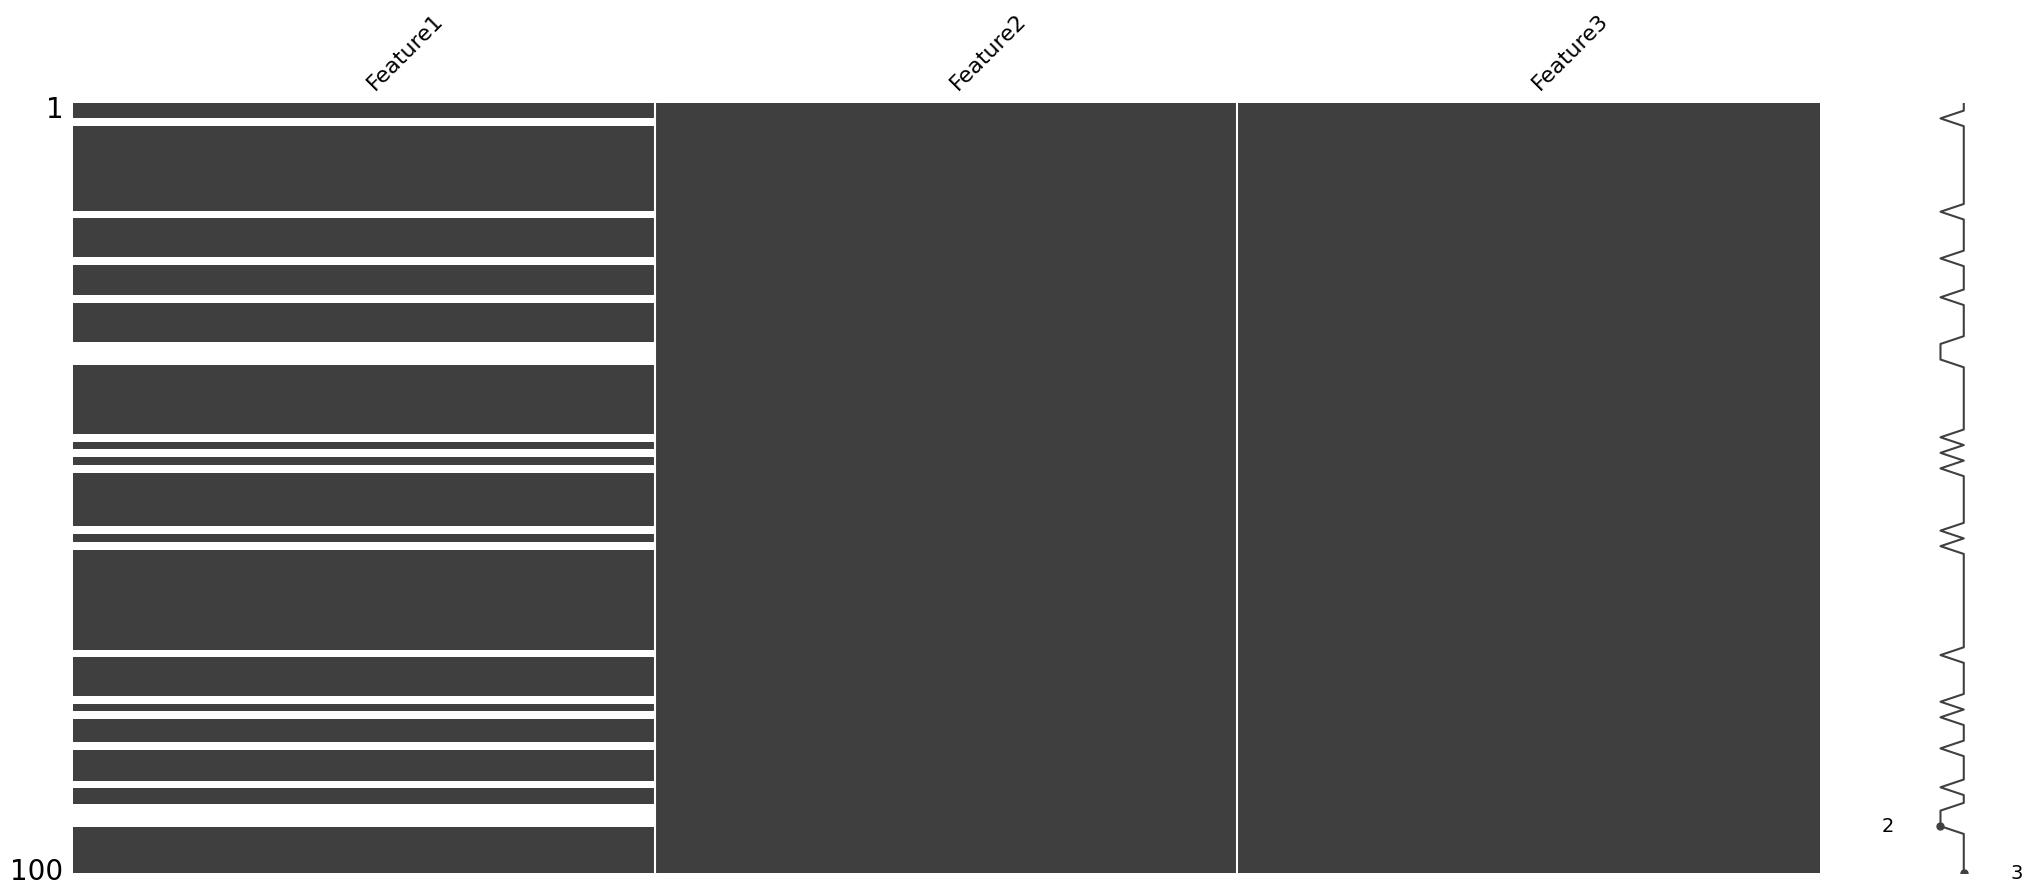

In [24]:
import missingno as msno
import matplotlib.pyplot as plt

# Matrix plot to visualize missing values
msno.matrix(df)
plt.show()


#  Identifying MCAR and MAR in Data

Understanding *why* values are missing is essential in data preprocessing, as it determines how we should handle the missingness.  
There are three main mechanisms of missing data:  
- **MCAR (Missing Completely At Random)**  
- **MAR (Missing At Random)**  
- **MNAR (Missing Not At Random)**  

This note focuses on how to **identify MCAR and MAR** using logical reasoning, data exploration, and statistical interpretation.

---

##  What is MCAR?

**Missing Completely At Random (MCAR)** means that the probability of missingness is **completely independent**  
of both the observed and unobserved data.

> In simple terms, missingness occurs purely by chance — it has **no relationship** with any variable in the dataset.

**Example:**  
- A sensor randomly fails while recording temperature (no pattern).  
- A survey response gets accidentally deleted due to a technical glitch.  
- Some forms were misplaced randomly during data entry.

These are purely random events — not related to the data values — hence **MCAR**.

---

##  Implications of MCAR

If your data is MCAR:
- Missingness does not bias your data.  
- Analyses using complete cases will remain **unbiased**, though statistical **efficiency may drop**.  
- Simple imputation or deletion is acceptable because missingness adds only randomness, not bias.

---

##  How to Identify MCAR

While you can never *prove* MCAR with certainty, you can **test for evidence supporting it**.

### **1. Check Randomness of Missingness**

If missing values are spread **uniformly** across the dataset (no pattern by category, group, or feature),  
it suggests randomness.

**Example:**  
If missing income values occur equally across all genders, age groups, or locations → likely MCAR.

---

### **2. Compare Missing vs. Non-Missing Groups**

Divide your data into two groups:
- **Group A:** Rows with missing values for a given variable.  
- **Group B:** Rows with non-missing values for that variable.

Now, compare **other features** between these two groups.

- If there are **no significant differences**, missingness is likely **MCAR**.  
- If differences exist, missingness depends on observed variables → **MAR**.

---

### **3. Visual Pattern Analysis**

Visualize missingness patterns:
- Use heatmaps or missing-value matrices to see if certain rows/columns cluster together.
- If missingness looks random across the dataset, it supports **MCAR**.
- If missingness clusters by groups (e.g., age group, income bracket), it hints at **MAR**.

---

### **4. Statistical Tests for MCAR**

A formal way to test for MCAR is through the **Little’s MCAR Test** (in practice, implemented in R or Python).  
- Null Hypothesis (H₀): Data is MCAR.  
- If *p-value > 0.05*, we fail to reject H₀ → evidence supports MCAR.  
- If *p-value < 0.05*, we reject H₀ → data not MCAR (could be MAR or MNAR).

---

### **5. Logical Reasoning**

Always check if there’s a **plausible reason** for missingness.
- If none can be logically associated with other features or the value itself → likely MCAR.
- If missingness can be explained by any pattern → not MCAR.

---

##  Summary: Identifying MCAR

| Indicator | Observation | Interpretation |
|------------|--------------|----------------|
| Missing values randomly scattered | No clear pattern | Possibly MCAR |
| Missingness unrelated to other variables | No group differences | Supports MCAR |
| No real-world cause for missingness | Purely random reason | Likely MCAR |
| Statistical test (Little’s Test) non-significant | Fail to reject MCAR hypothesis | MCAR confirmed |

---

##  What is MAR?

**Missing At Random (MAR)** means that the probability of missingness depends **only on other observed variables**,  
but **not on the missing value itself**.

> Example: Wealthier people are less likely to report their age → Missingness in *Age* depends on *Income* (observed).

If missingness depends on the variable itself (e.g., low-income people hiding income), it becomes **MNAR**.  
If it has no relation to any variable → **MCAR**.

---

##  Implications of MAR

If data is MAR:
- Missingness introduces bias if ignored.  
- However, bias can be corrected by **model-based imputations** that use observed variables.  
- Techniques like **Regression Imputation**, **KNN**, and **Multiple Imputation (MICE)** work well.

---

##  How to Identify MAR

You can infer MAR by checking whether missingness relates to **other observed data**.

---

### **1. Look for Patterns and Group Behavior**

If missingness is concentrated in particular groups or segments, it is unlikely to be random.

**Examples:**
- Older respondents skip income questions → Missingness in *Income* depends on *Age*.  
- Patients with long hospital stays have incomplete bills → Missingness in *Billing* depends on *Stay Duration*.  
- Students with poor attendance don’t submit marks → Missingness in *Marks* depends on *Attendance*.

Each of these implies **MAR**, since missingness can be explained by *observed* features.

---

### **2. Compare Missing vs. Non-Missing Groups**

Divide the data into:
- **Group 1:** Rows where a variable is missing.  
- **Group 2:** Rows where that variable is observed.

Compare other features (e.g., mean, median, distribution, or frequency).  
If differences exist, missingness depends on observed variables → **MAR**.

**Example:**  
If people who didn’t report *Age* have higher *Income*,  
then *Age* is missing depending on *Income* → **MAR**.

---

### **3. Study Distributions**

Compare the distributions of other observed variables between missing and non-missing groups.  
If distributions differ significantly (e.g., one group has higher average income, different gender proportions, etc.),  
then missingness likely depends on those variables → **MAR**.

**Example:**  
If missing *Weight* values occur more among females than males,  
then missingness in *Weight* depends on *Gender* → **MAR**.

---

### **4. Logical and Contextual Reasoning**

Always apply **domain knowledge** to interpret missingness patterns.

Ask:
- Is there a realistic reason why certain groups have more missing data?  
- Does the missingness pattern make sense in context?

If yes, and it depends on observable attributes → **MAR**.

---

### **5. Machine Learning Approach**

Treat missingness as a binary target:
- `1` = Missing, `0` = Not Missing.  
Train a classification model using other observed features to predict missingness.

- If the model predicts missingness well → missingness depends on observed variables → **MAR**.  
- If it fails → likely **MCAR**.  
- If only the variable itself can explain missingness → **MNAR**.

This approach quantifies how predictable the missingness is from observed data.

---

##  Summary: Identifying MAR

| Indicator | Observation | Interpretation |
|------------|--------------|----------------|
| Missingness depends on other observed variables | Relationships found | Likely MAR |
| Missing and non-missing groups differ in other variables | Statistical difference present | MAR |
| Visual distribution differs across groups | Clear trend/pattern | MAR |
| Logical/real-world explanation exists | Explained by known variable | MAR |
| Predictable missingness via ML model | Dependent on observed data | MAR |

---

##  MCAR vs MAR: Comparison

| Aspect | MCAR | MAR |
|--------|------|-----|
| Definition | Missingness is completely random | Missingness depends on other observed variables |
| Dependency | Not related to any variable | Related to observed variables only |
| Example | Random sensor failure | High-income people skip age |
| Detection | No group differences | Group differences in other variables |
| Bias Impact | No bias, only loss of data | Causes bias if ignored |
| Best Treatment | Deletion or mean imputation | Model-based imputation (e.g., MICE, regression) |
| Verification | Little’s Test or visual inspection | Statistical and logical inference |

---

##  Final Takeaways

- **MCAR:** Missingness is completely random → no bias → safe to delete or use simple imputation.  
- **MAR:** Missingness depends on observed data → can cause bias if ignored → use model-based imputation.  
- **MNAR (for reference):** Missingness depends on the missing value itself → hardest to handle → often requires advanced modeling or domain correction.

---

> **In summary:**  
> - If missingness shows **no relationship** with any feature → **MCAR**.  
> - If missingness shows a **relationship with other observed features** → **MAR**.  
> - If missingness depends on the **unobserved (missing) value itself** → **MNAR**.

---


In [25]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
f2 = np.random.randn(n_samples)  # Feature 2: Normal distribution
f3 = np.random.rand(n_samples) * 100  # Feature 3: Uniform distribution between 0 and 100

# Generate Feature 1 with a dependency on Feature 2 for missingness
f1 = np.random.randn(n_samples) * 50  # Initial Feature 1: Normal distribution, scaled
# Introduce missing values in f1 based on f2; higher values of f2 are more likely to result in missing f1 values
missing_probability = (f2 - f2.min()) / (f2.max() - f2.min())  # Normalize f2 to get probabilities
f1[missing_probability > 0.8] = np.nan  # Set f1 to NaN where missing_probability > 0.8

# Create DataFrame
df = pd.DataFrame({'Feature1': f1, 'Feature2': f2, 'Feature3': f3})

df.head()


,Feature1,Feature2,Feature3
0,0.650095,0.496714,41.741100
1,72.676704,-0.138264,22.210781
2,-13.232842,0.647689,11.986537
3,NaN,1.523030,33.761517
4,31.283367,-0.234153,94.290970


In [26]:
df.isnull().sum()

Feature1    13
Feature2     0
Feature3     0
dtype: int64

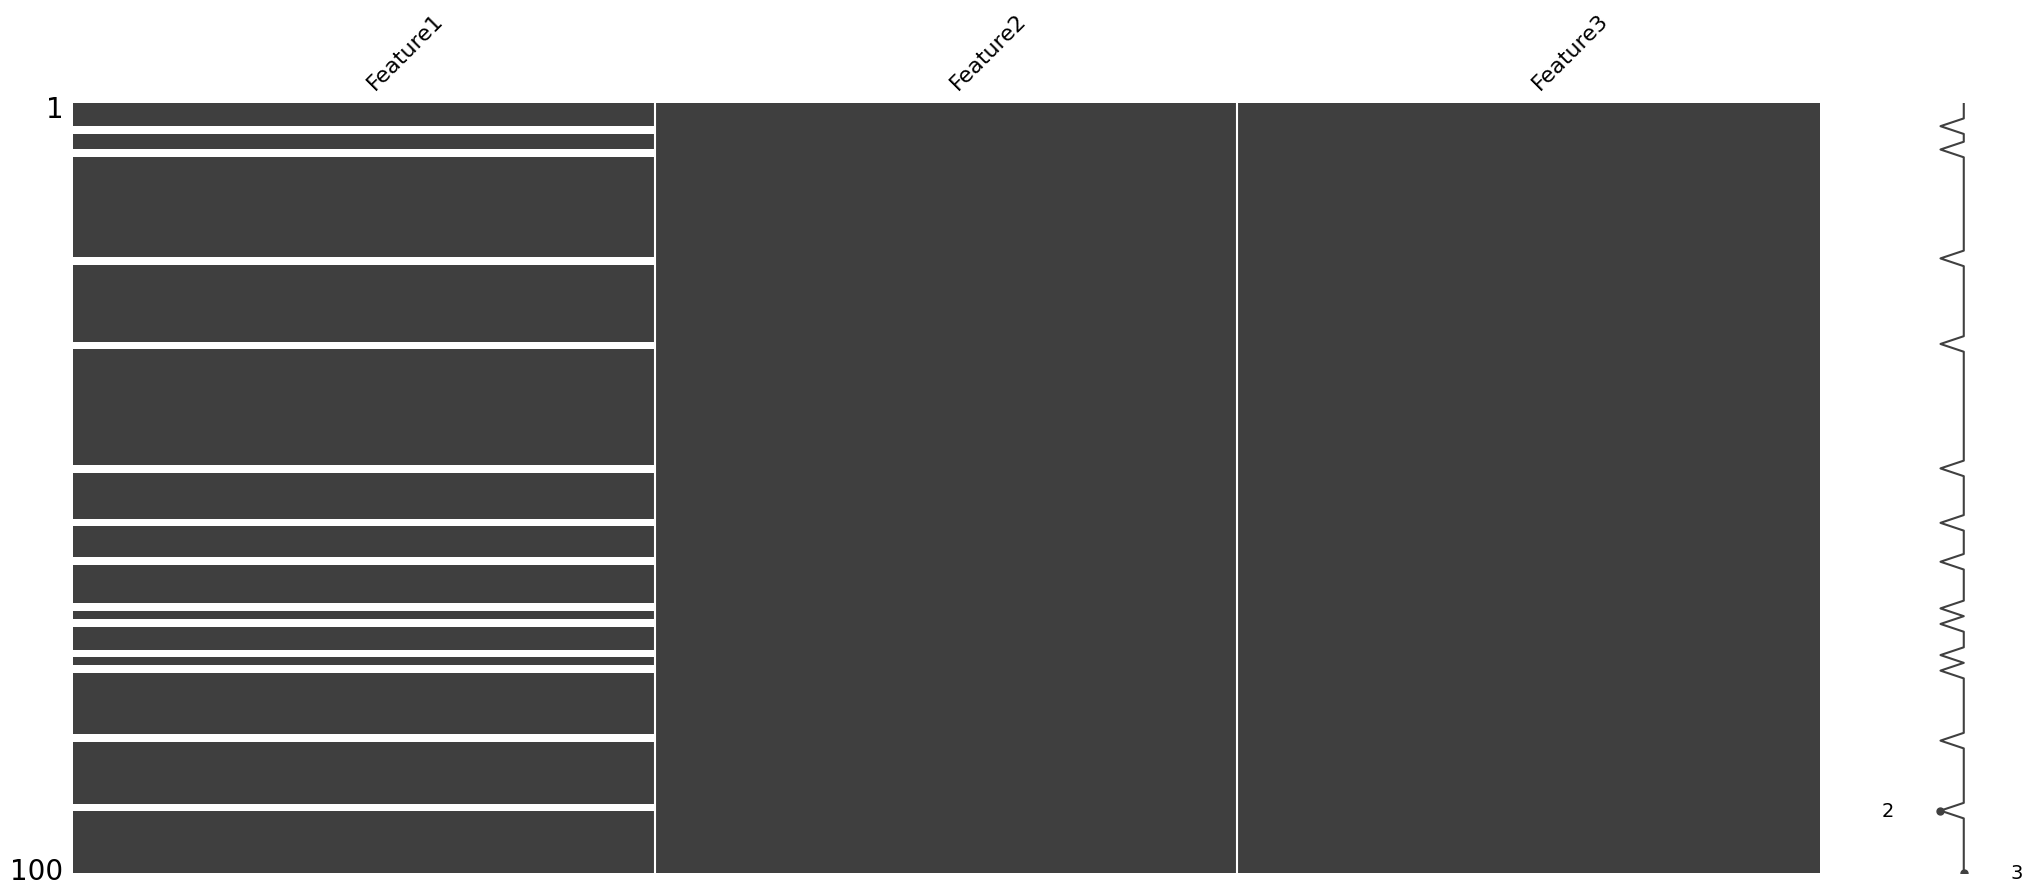

In [27]:
# Matrix plot to visualize the missing data
msno.matrix(df)
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a binary indicator for missingness in Feature1
df['Feature1_missing'] = df['Feature1'].isnull().astype(int)

# Prepare the independent variables (X) and the target variable (y)
X = df[['Feature2', 'Feature3']]  # or just df[['Feature2']] if focusing on Feature2
y = df['Feature1_missing']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00         2

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
model.coef_

array([[2.80895614, 0.00525627]])

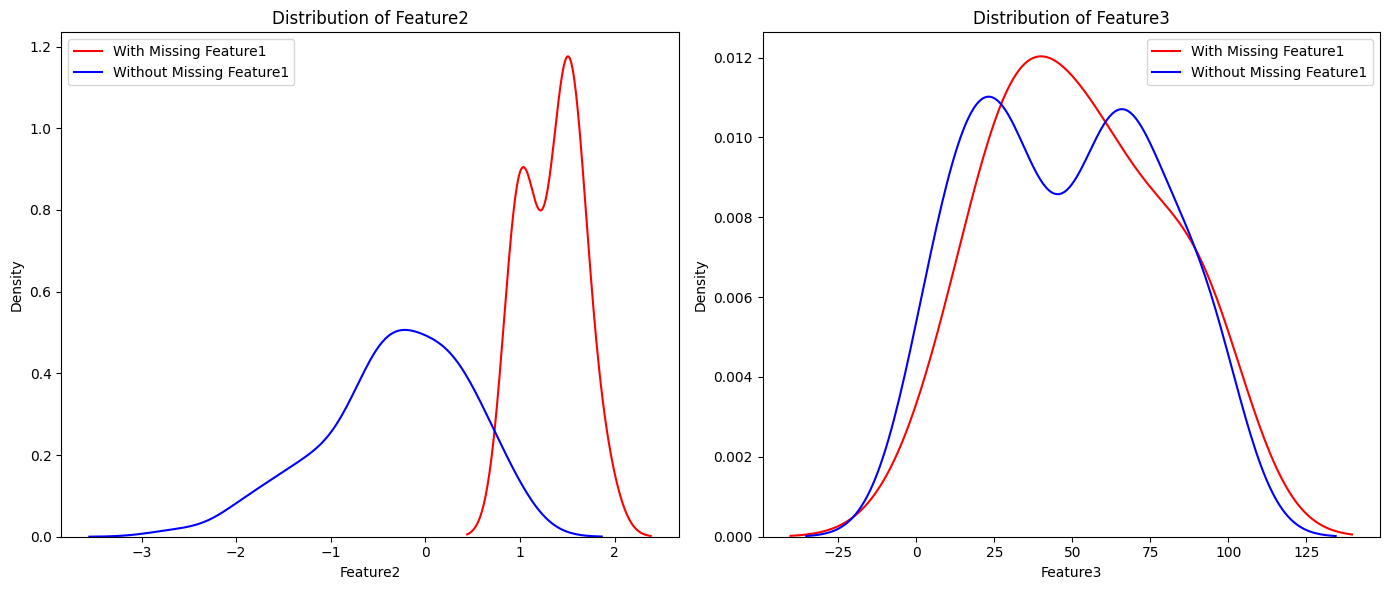

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split the DataFrame into two groups based on missingness in Feature1
group_with_missing = df[df['Feature1'].isnull()]
group_without_missing = df[~df['Feature1'].isnull()]

# Compare distributions of Feature2 and Feature3 across the two groups
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting the distribution of Feature2 for both groups
sns.kdeplot(group_with_missing['Feature2'], color='red', label='With Missing Feature1', ax=axes[0])
sns.kdeplot(group_without_missing['Feature2'], color='blue', label='Without Missing Feature1', ax=axes[0])
axes[0].set_title('Distribution of Feature2')
axes[0].legend()

# Plotting the distribution of Feature3 for both groups
sns.kdeplot(group_with_missing['Feature3'], color='red', label='With Missing Feature1', ax=axes[1])
sns.kdeplot(group_without_missing['Feature3'], color='blue', label='Without Missing Feature1', ax=axes[1])
axes[1].set_title('Distribution of Feature3')
axes[1].legend()

plt.tight_layout()
plt.show()


#  How to Handle Missing Values?

Managing missing data is a key part of data preprocessing.  
There are three main strategies for handling missing values:

1. **Removing**
2. **Imputation**
3. **Using Algorithms that Can Handle Missing Values**

---

##  How to Decide Which Approach to Use?

When deciding how to handle missing values, consider the following factors:

### **1. The Mechanism of Missingness**
Understanding *why* the data is missing —  
whether it is **Missing Completely at Random (MCAR)**, **Missing at Random (MAR)**, or **Missing Not at Random (MNAR)** —  
helps determine the most appropriate imputation or removal strategy.

---

### **2. The Amount of Missing Data**
If a feature has a **very high percentage of missing values**,  
it might be more reasonable to **remove it entirely** rather than attempt imputation,  
since excessive missingness can lead to unreliable estimates.

---

### **3. The Type of Data (Categorical vs. Continuous)**
Different imputation techniques work better for different data types:
- **Continuous data:** Mean or regression-based imputation methods are common.  
- **Categorical data:** Mode imputation or predictive modeling can be more appropriate.

---

### **4. The Model Being Used**
Some machine learning algorithms:
- Require **complete datasets** (e.g., Linear Regression, Logistic Regression).  
- Can **natively handle missing values** (e.g., Decision Trees, Random Forests, XGBoost).

Choose a strategy that aligns with the algorithm’s ability to manage missingness directly.

---

> **In essence:**  
> The right way to handle missing values depends on *why* they’re missing, *how much* is missing, *what type* of data you have,  
> and *which models* you plan to use.


#  Removing Missing Values

---

##  Methods of Removing Missing Values

There are two primary ways to remove missing values:

1. **By Dropping Columns (Features)**
2. **By Dropping Rows (Records)**

---

##  When to Drop Columns

Dropping a column means removing an entire feature from the dataset. This is usually done when the column provides little to no reliable information or when missingness is too high.

###  Situations to Drop Columns:

1. **High Percentage of Missing Data**  
   If a large portion (e.g., more than 40–50%) of a column’s values are missing, it may be better to drop it. The feature may not carry enough data to be useful.

2. **Low Importance of the Feature**  
   If the feature is not critical to analysis or modeling objectives, and removing it does not affect the outcome, it can be dropped safely.

3. **Feature Can’t Be Imputed Reliably**  
   If you cannot estimate missing values meaningfully (for example, if the data is categorical and has many missing entries), removing the column is reasonable.

4. **Redundant or Uninformative Columns**  
   Columns with repetitive or unnecessary information can be dropped to simplify the dataset.

 *Before dropping, always assess how much data will be lost and whether that feature holds any predictive or interpretive value.*

---

##  When to Drop Rows (Listwise Deletion)

**Listwise deletion** (also called **complete-case analysis**) means removing all rows that have any missing values. This approach is straightforward but can reduce sample size.

###  Situations to Perform Listwise Deletion:

1. **Small Percentage of Missing Data**  
   If only a small fraction (typically less than 5%) of rows contain missing values, deleting them usually won’t affect results significantly.

2. **Data is MCAR (Missing Completely At Random)**  
   When the missingness is random and not related to other features or the outcome variable, deletion is statistically safe.

3. **Preserves the Overall Data Distribution**  
   If removing missing rows does not distort the dataset’s distribution, it is acceptable to proceed.

4. **Production Data Expected to Be Complete**  
   If the final system (production environment) will always have complete data, training or testing on complete cases makes sense.

---

##  Important Considerations

- **Loss of Information:** Removing rows or columns reduces available data.  
- **Potential Bias:** If missingness is not random (e.g., missing values depend on another variable), deletion can bias results.  
- **Distribution Changes:** Dropping data might distort the underlying feature distribution.  

Hence, **analyze the pattern and percentage of missing values** before deciding on removal.

---

##  Decision Guidelines

| Method | When to Use | Benefits | Drawbacks |
|--------|--------------|-----------|------------|
| Drop Columns | When column has a large percentage of missing data or low importance | Simplifies dataset | May lose valuable features |
| Drop Rows | When few rows are missing and data is MCAR | Easy to apply, keeps features intact | Reduces sample size, possible bias |

---

Removing missing values is suitable when:
- Missing data is **random and limited** in amount.  
- The **feature is unimportant** or has **too much missingness** to be useful.  
- You are **sure that removing records won’t bias** the results or distort distributions.  

In all other cases, consider **imputation** (filling missing values using mean, median, mode, or model-based methods).


### Listwise Deletion (CCA)

In [31]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [32]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [33]:
df = df[['city_development_index', 'enrolled_university',	'education_level',	'experience',	'training_hours']]
df.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [34]:
# CCA applied
new_df = df.dropna()
df.shape, new_df.shape

((19158, 5), (17182, 5))

In [35]:
len(new_df) / len(df)

0.8968577095730244

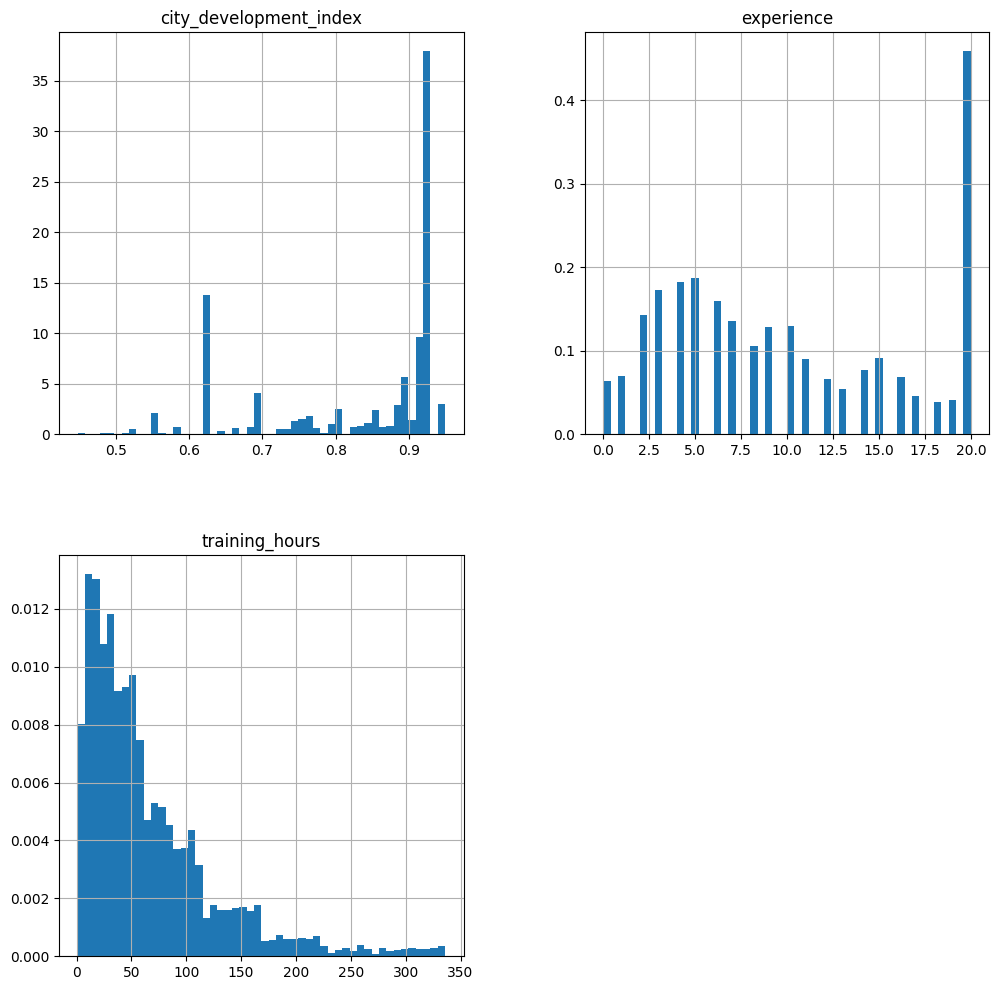

In [36]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<Axes: >

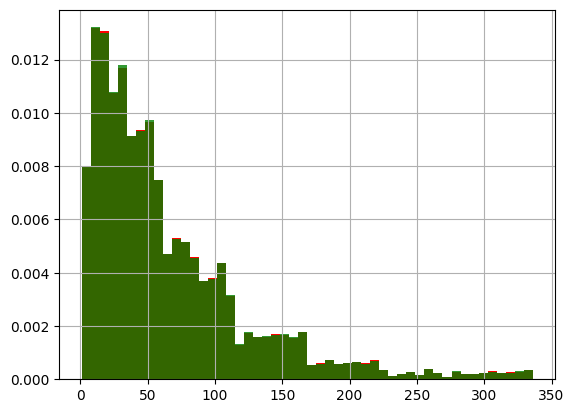

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

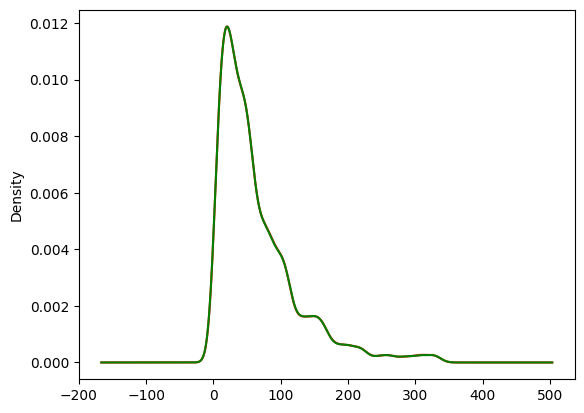

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: >

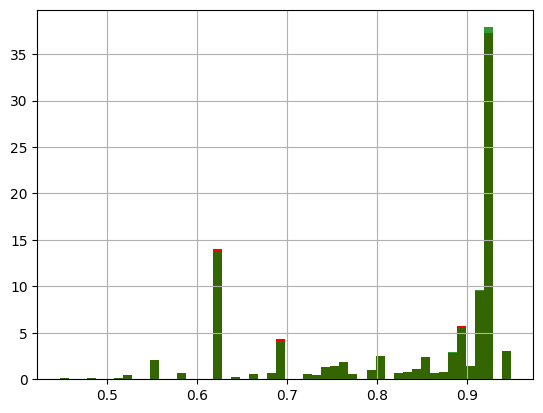

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

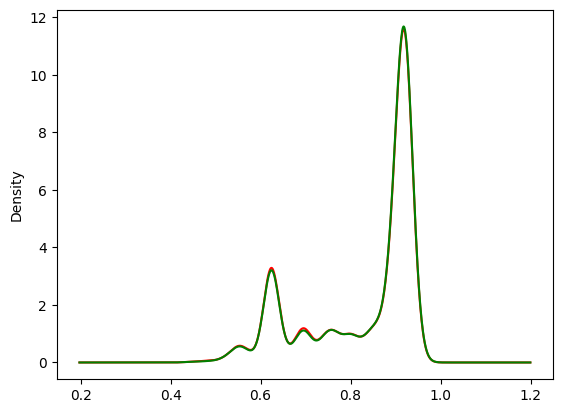

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<Axes: >

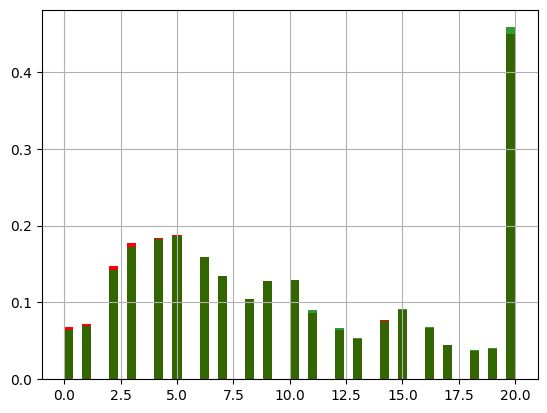

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

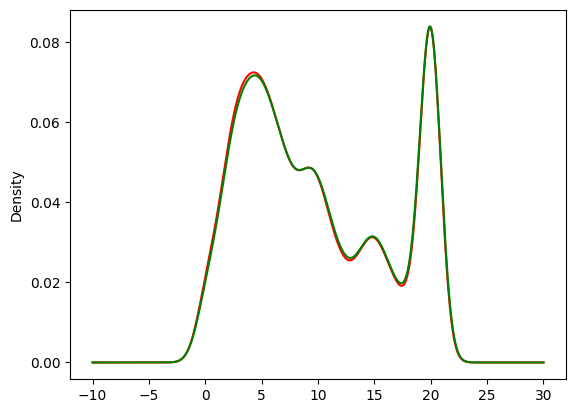

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [43]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [44]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


# Handling Missing Data — Imputation Techniques

When data is missing, deleting rows or columns may not always be ideal. A better approach in many situations is **imputation**, where missing values are filled with substituted estimates. Imputation preserves data size and statistical power while reducing bias — but the choice of imputation method depends on the nature and mechanism of missingness.

---

## What is Imputation?

**Imputation** is the process of replacing missing values in a dataset with estimated or predicted values. These estimates are derived from available data, ensuring the dataset remains usable for analysis and modeling.

There are two main categories of imputation:

1. **Univariate Imputation** — fills missing values using information from a single feature (column).  
2. **Multivariate Imputation** — fills missing values using information from multiple features (columns) simultaneously.

---

## Types of Imputers

### 1. Simple (Univariate) Imputers

These imputers replace missing values in each column independently — without considering relationships with other variables.

Univariate imputation is simple, fast, and widely used in exploratory stages of data analysis. It assumes missing values can be estimated from the **distribution of non-missing data** in the same column.

---

## Common Univariate Imputation Techniques

### 1. Mean Imputation

Replaces missing numeric values with the **mean** of available observations.  

- Works well for symmetric, normally distributed data.  
- Not ideal for skewed distributions; underestimates variance and may distort correlations.

---

### 2. Median Imputation

Replaces missing values with the **median** of observed data.  

- Robust to outliers and skewed data.  
- Can distort relationships if missingness is not random.

---

### 3. Mode Imputation

Replaces missing values with the **most frequent** category (for categorical variables).  

- Simple and intuitive.  
- Can over-represent common categories, reducing diversity.

---

### 4. Constant or Custom Value Imputation

Fills missing entries with a specified constant (e.g., `0`, `"Unknown"`, or `"Missing"`).  

- Useful for categorical or text-based features.  
- May add artificial values that have no true statistical meaning.

---

### 5. Forward / Backward Fill (Time Series)

Used primarily for **time-series** or **sequential data**.  

- **Forward Fill:** Uses the last known value to fill missing points.  
- **Backward Fill:** Uses the next known value.  
- Preserves temporal continuity.  
- Can propagate prior errors if missingness is frequent.

---

### 6. Missing Indicator Technique

A **Missing Indicator** is a **binary feature** that marks whether data was missing for a given observation in another column.

For each feature with missing values, a new feature (column) is created:
- `1` → Data was missing  
- `0` → Data was present

This approach **does not directly fill** missing values, but is often combined with imputers (like mean or median) to help models detect whether the absence of data itself is meaningful.

#### When to Use
1. **Missingness is Informative (MNAR)** — If missingness itself carries predictive value.  
   Example: In a medical dataset, if a test result is missing, it might imply that the test was skipped due to patient health conditions — which could correlate with outcomes.

2. **Data is Missing Not at Random (MNAR)** — The probability of missingness is related to the missing value itself.  
   Example: High-income individuals might skip reporting their salary. Missingness can indicate a pattern.

3. **High Prevalence of Missing Data** — When many records have missing values, adding an indicator can help preserve signal instead of deleting data.

#### When Not to Use
- **MCAR (Missing Completely at Random):** If data is missing randomly, missing indicators may just add noise.  
- **Minimal Missing Data:** When missingness is rare, extra features add unnecessary complexity.  
- **Risk of Overfitting:** Too many indicators can increase dimensionality and overfit small datasets.

#### Why It’s Considered a Univariate Technique

Although a missing indicator does not fill values, it uses only information from the same feature’s missingness pattern, not other features. Therefore, it is conceptually part of **univariate imputation** strategies — often used alongside imputation to preserve information about missingness.

Example:  
Suppose a column `Income` has missing values.  
- Create a new column `Income_Missing`:  
  - 1 → Missing  
  - 0 → Present  
- Then, impute the missing `Income` values (e.g., using median).  

This way, both the **value** and the **missingness** pattern are preserved.

---

## Summary — Univariate Imputation Techniques

| Technique | Data Type | Robust to Outliers | Preserves Variance | Captures Missingness | Complexity |
|------------|------------|-------------------|--------------------|----------------------|-------------|
| Mean | Numeric | No | No | No | Low |
| Median | Numeric | Yes | Partial | No | Low |
| Mode | Categorical | N/A | No | No | Low |
| Constant | Any | Yes | No | Sometimes | Low |
| Forward/Backward Fill | Sequential | Yes | Yes | No | Medium |
| Missing Indicator | Any | Yes | Yes | Yes | Low–Medium |

**Key Point:**  
Use **Missing Indicators** alongside imputers to signal that missingness may carry information. This is especially valuable for predictive models that can interpret binary flags.

---

## 2. Advanced (Multivariate) Imputers

Multivariate imputers use relationships among multiple features to predict and fill missing values.

---

### 1. K-Nearest Neighbors (KNN) Imputer

Replaces missing values by averaging the values of **k nearest neighbors** (based on similarity in other features).  

- Considers inter-feature relationships.  
- Sensitive to scaling; computationally expensive.

---

### 2. Iterative Imputer (Regression Imputation)

Predicts each feature with missing values as a function of other features.  

- Captures linear dependencies.  
- Assumes linearity unless customized.

---

### 3. Multivariate Imputation by Chained Equations (MICE)

Performs multiple imputations by estimating missing values from other variables repeatedly.  

- Reflects uncertainty through multiple plausible datasets.  
- Complex and resource-intensive.

---

### 4. Model-Based Imputation

Uses predictive models (e.g., linear regression, random forest) to estimate missing values.  

- Captures complex, non-linear relationships.  
- Requires model tuning and sufficient data.

---

## Univariate vs. Multivariate Imputation — Comparison

| Feature | Univariate Imputation | Multivariate Imputation |
|----------|-----------------------|--------------------------|
| Data Used | Single feature | Multiple related features |
| Assumptions | Missingness independent of other variables | Missingness related to other features |
| Complexity | Simple | More complex |
| Preserves Relationships | No | Yes |
| Computational Cost | Low | High |
| Risk of Bias | Moderate | Lower (if model is correct) |
| Examples | Mean, Median, Mode, Missing Indicator | KNN, Iterative, MICE |

---

## Choosing the Right Imputation Method

| Situation | Recommended Method |
|------------|--------------------|
| Small amount of missing data | Mean/Median/Mode |
| Skewed numeric data | Median |
| Categorical data | Mode or Constant |
| Time-series | Forward/Backward Fill |
| Missingness carries meaning | Missing Indicator + Imputer |
| Correlated features | KNN or Iterative Imputer |
| Complex dependencies | MICE or Model-based |

---

## Key Considerations

- Understand missingness mechanism (MCAR, MAR, MNAR): Imputation should match missingness nature.  
- Avoid target leakage: Never use target variable for imputing features in supervised tasks.  
- Scale features before KNN or distance-based imputations.  
- Validate imputations: Compare feature distributions before and after filling values.  
- Combine missing indicators when missingness itself may carry predictive signal.

---

- **Univariate Imputers** (Mean, Median, Mode, Constant, Missing Indicator) are simple, interpretable, and fast.  
- **Missing Indicator** acts as a companion flag to preserve missingness information.  
- **Multivariate Imputers** (KNN, Iterative, MICE) use relationships between features for more accurate estimates.  

The best imputation method depends on **data type**, **missingness pattern**, and **analysis goals** — always validate your choice.

---


# Missing Indicator Technique

A **Missing Indicator** is an additional binary feature created to identify whether data was missing for a particular observation in another column. It allows the model to capture patterns where the **absence of data itself carries meaning**.

This method doesn’t fill in missing values directly — instead, it helps the model recognize when and where missingness occurs.

---

## How It Works

For every feature (column) in your dataset that contains missing values, you create a new **binary column** (indicator variable):

- **Value = 1:** Indicates the data in the original feature is missing for that observation.  
- **Value = 0:** Indicates the data in the original feature is present.

This way, the model can learn from the *pattern of missingness* — not just from the observed data.

---

### Example (Conceptual)

If a dataset has a column `Age` with missing values, create a new column:

| Age | Age_Missing |
|-----|--------------|
| 25  | 0            |
| NaN | 1            |
| 40  | 0            |
| NaN | 1            |

The model can now consider both `Age` (values) and `Age_Missing` (missingness pattern).

---

## Titanic Dataset Example

Consider the **Titanic dataset**, which contains a `Cabin` feature — this column has a large number of missing values. At first glance, one might be tempted to **drop** it because it is mostly incomplete, or attempt to **impute** the values, which would be unreliable since the missingness is not random.

However, upon closer inspection, we notice an interesting pattern:

- The **Cabin** information was often recorded for **first-class (Pclass = 1)** passengers — who were generally wealthier.  
- Lower-class passengers (Pclass = 2 or 3) frequently lacked cabin assignments.

This suggests that **missingness in the `Cabin` column is not random**. It correlates with the **financial or social status** of the passengers.

Now, if we create a **missing indicator** for the `Cabin` feature:

| PassengerId | Pclass | Cabin | Cabin_Missing |
|--------------|---------|--------|----------------|
| 1 | 1 | C85 | 0 |
| 2 | 3 | NaN | 1 |
| 3 | 1 | C123 | 0 |
| 4 | 3 | NaN | 1 |

The `Cabin_Missing` column now acts as a **proxy for wealth** — since wealthier passengers were more likely to have a cabin assigned.

This becomes valuable because:
- **Wealthy passengers** had a **higher chance of survival** — they were prioritized during evacuation.
- Thus, **Cabin_Missing** indirectly captures **financial status** and **survival likelihood**.

In this way, the **missingness itself becomes predictive**. By converting it into a binary flag, we **extract additional signal** that could help the model better predict survival outcomes.

> Therefore, rather than dropping the `Cabin` column or trying to impute it blindly, creating a missing indicator preserves the informative nature of missingness and adds value to the model.

---

## When to Use Missing Indicators

1. **Missingness is Informative**  
   When the fact that a value is missing itself provides insight.  
   Example: In a medical dataset, the absence of a certain test result might reflect a doctor’s decision, which could be predictive of patient outcomes.

2. **Data is Missing Not at Random (MNAR)**  
   When the likelihood of missingness depends on the unobserved value itself.  
   Example: High-income individuals might choose not to report their salary in surveys. The missing pattern itself becomes meaningful.

3. **High Prevalence of Missing Data**  
   When a significant proportion of values are missing, missing indicators can help preserve information rather than dropping too much data.

---

## When Not to Use Missing Indicators

1. **Data is Missing Completely at Random (MCAR)**  
   If missingness is random and unrelated to other variables or itself, adding a missing indicator usually provides no extra value and can complicate the model unnecessarily.

2. **Minimal Missing Data**  
   If only a tiny fraction of values are missing, the complexity added by creating missing indicators is not worth it.

3. **Risk of Overfitting**  
   In datasets with many features and many missing values, adding multiple indicators can **inflate feature space** and **overfit** the model, especially with small sample sizes.

---

## Key Takeaways

- Missing indicators are helpful when missingness **carries meaning** or is **systematic**.  
- Avoid them if missing data is **random** or **rare**.  
- Use them carefully — too many indicators can make your model unnecessarily complex.  
- They can be combined with **imputation**: first fill missing values (e.g., with mean/median), then add an indicator column to flag where imputation occurred.

---

### Table

| Situation | Use Missing Indicator? | Reason |
|------------|-----------------------|---------|
| Missingness is informative | Yes | The absence of data conveys useful information |
| Data is MNAR | Yes | Missingness relates to the value itself |
| Many missing values | Yes | Retains data structure and signal |
| Data is MCAR | No | Missingness is purely random |
| Very few missing values | No | Adds unnecessary complexity |
| Many variables with missingness | Caution | Can increase risk of overfitting |

---



In [45]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import MissingIndicator,SimpleImputer

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv',usecols=['Age','Fare', 'Cabin','Survived'])
df.head()

,Survived,Age,Fare,Cabin
0,0,22.0,7.2500,NaN
1,1,38.0,71.2833,C85
2,1,26.0,7.9250,NaN
3,1,35.0,53.1000,C123
4,0,35.0,8.0500,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   Cabin     204 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 28.0+ KB


In [48]:
X = df.drop(columns=['Survived', 'Cabin'])
y = df['Survived']

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [52]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    transformers=[
        ('age_imputer', SimpleImputer(strategy='mean'), ['Age']),
        ('cabin_indicator', MissingIndicator(), ['Cabin'])
    ],
    remainder='passthrough'  # This specifies that columns not explicitly selected should be passed through without transformation
)

In [54]:
X_train_new = column_transformer.fit_transform(X_train)
X_test_new = column_transformer.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_new,y_train)

y_pred = clf.predict(X_test_new)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.659217877094972

### Using Mean and Median Imputation

The **SimpleImputer** class in `scikit-learn` is one of the most widely used tools for **univariate imputation**.  
It operates **column by column**, imputing missing values **independently** for each feature.

SimpleImputer supports four main strategies:

1. **Mean Imputation** – replaces missing numeric values with the mean of non-missing values.  
2. **Median Imputation** – replaces missing numeric values with the median of non-missing values.  
3. **Most Frequent Imputation** – replaces missing values with the most common category (for categorical data).  
4. **Constant Imputation** – replaces missing entries with a specified constant (e.g., `0`, `"Unknown"`, `"Missing"`).

Each of these methods assumes that missingness can be estimated **based solely on the distribution of observed values** within that column (i.e., univariate).

---

### 1. Mean Imputation

**Description:**  
Fills missing numeric values with the **average (mean)** of available observations in the same feature.

**When to Use:**  
- Data is **normally distributed** (symmetric).  
- The percentage of missing data is **small to moderate**.  
- No extreme **outliers** are present.

**When Not to Use:**  
- Data is **skewed** or **contains outliers**, since the mean can be heavily influenced.  
- If missingness is **not random**, mean imputation may bias results.  
- For **categorical or ordinal features**, mean imputation is not suitable.

**Impact:**  
- Reduces variance (since all imputed values are identical).  
- Can distort correlations between variables.

---

### 2. Median Imputation

**Description:**  
Replaces missing values with the **median** (50th percentile) of non-missing values.

**When to Use:**  
- Data is **skewed** or has **outliers**.  
- The feature is **numeric and continuous**.  
- Missingness is **random (MCAR or MAR)**.

**When Not to Use:**  
- When preserving exact statistical relationships is crucial (since median may alter variance).  
- For **categorical data**, median imputation is not applicable.

**Impact:**  
- More robust to extreme values than mean imputation.  
- Preserves central tendency without being influenced by outliers.

---

### 3. Most Frequent (Mode) Imputation

**Description:**  
Fills missing values with the **most common (mode)** value in the column.

**When to Use:**  
- For **categorical** or **ordinal** features.  
- When you want to retain the **dominant class** in a feature.  
- Works well if a **large portion of data** has a single recurring value.

**When Not to Use:**  
- If the feature has **high cardinality** (many unique categories), mode imputation may distort the true distribution.  
- If the **mode is not informative** (e.g., evenly distributed categories).

**Impact:**  
- Can overrepresent the most frequent category, reducing diversity.  
- Simple but can make categorical features less informative.

---

### 4. Constant Value Imputation

**Description:**  
Fills missing values with a **fixed constant value** (e.g., `0`, `"Unknown"`, `"Missing"`).

**When to Use:**  
- When missingness itself should be **explicitly marked** as a distinct category.  
- For **categorical variables** where `"Unknown"` can be meaningful.  
- When data requires **placeholder values** for model compatibility.

**When Not to Use:**  
- For **numeric features**, unless `0` or another constant has clear interpretability.  
- If missingness is frequent — constant imputation may dominate the feature.  
- If the constant introduces an **artificial pattern** not present in real data.

**Impact:**  
- Preserves dataset size without estimation.  
- May create misleading values if the constant has no contextual meaning.

---

### Summary — SimpleImputer Strategies

| Strategy | Data Type | Robust to Outliers | Preserves Variance | Suitable For | Notes |
|-----------|------------|-------------------|--------------------|---------------|--------|
| Mean | Numeric | No | No | Symmetric, Normal Data | Fast, but distorts skewed data |
| Median | Numeric | Yes | Partially | Skewed, Numeric Data | Robust to outliers |
| Most Frequent | Categorical | Yes | No | Categorical Data | Overrepresents common class |
| Constant | Any | Yes | No | Categorical/Text | Adds explicit placeholder |

---

### Key Considerations

- **Mean and Median** are best suited for **numeric** features.  
- **Mode and Constant** are best suited for **categorical** features.  
- These methods **ignore relationships** between variables — making them **univariate**.  
- Use **median** instead of mean for **skewed distributions** or **outlier-prone features**.  
- If missingness carries meaning, pair imputation with a **Missing Indicator** to preserve that signal.

---
  
`SimpleImputer` is an effective first-line tool for handling missing data.  
However, always analyze your data distribution and missingness mechanism before selecting a strategy.  
Use it when you need **quick, interpretable, and column-wise imputation** — but be mindful that it does **not model relationships across features**.


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day36-imputing-numerical-data/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [58]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

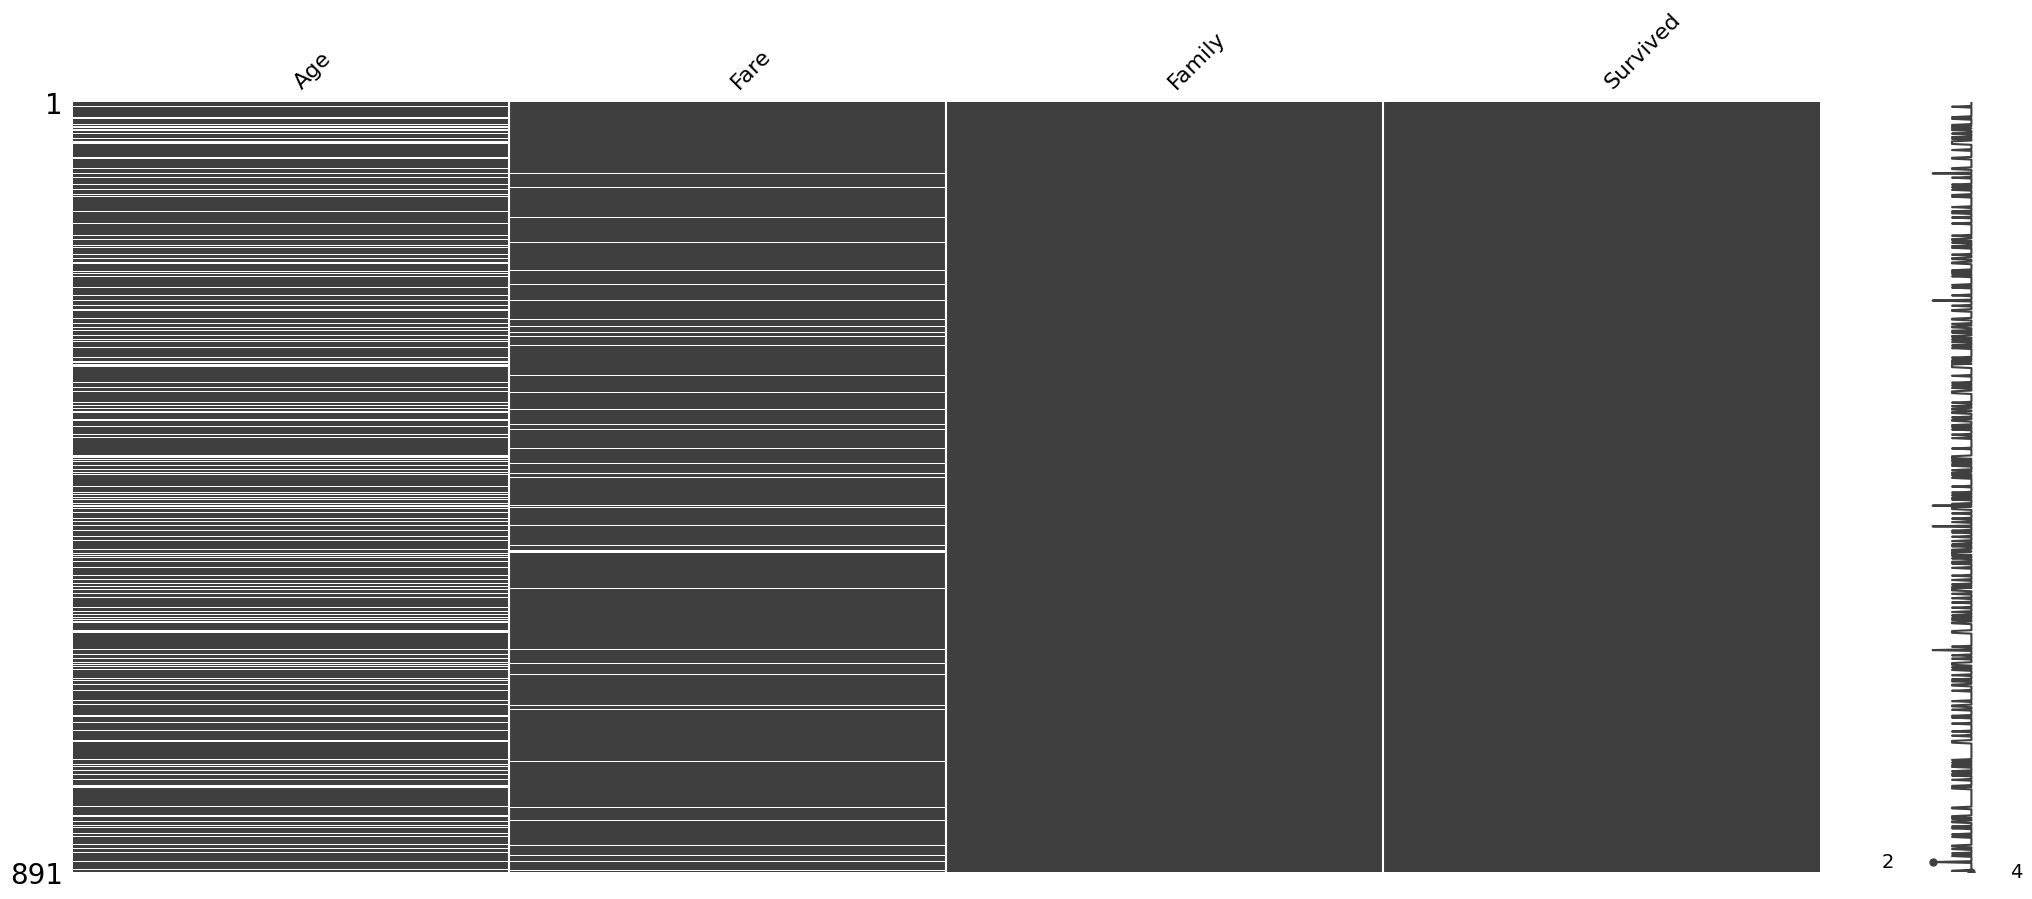

In [59]:
import missingno as msno
import matplotlib.pyplot as plt

# Matrix plot to visualize missing values
msno.matrix(df)
plt.show()

In [60]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [62]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [63]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
201,NaN,69.550,10,28.75,29.785904,69.550,69.550
722,34.0,13.000,0,34.00,34.000000,13.000,13.000
766,NaN,39.600,0,28.75,29.785904,39.600,39.600
696,44.0,8.050,0,44.00,44.000000,8.050,8.050
113,20.0,9.825,1,20.00,20.000000,9.825,9.825


In [64]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())
print("-"*70)
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
----------------------------------------------------------------------
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


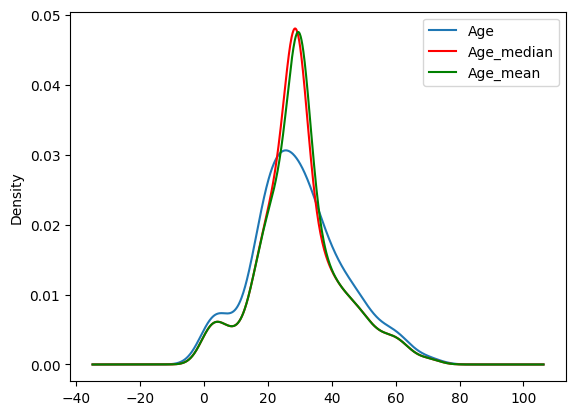

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

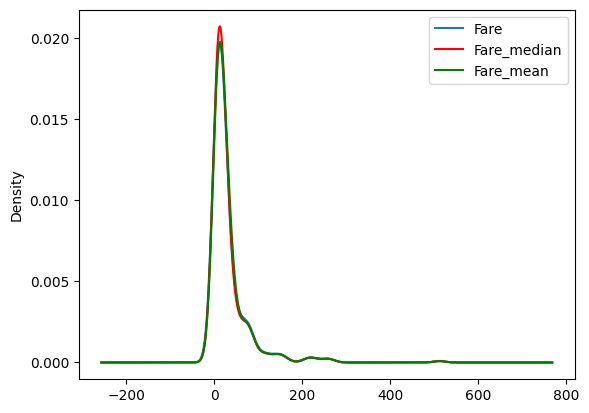

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [67]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

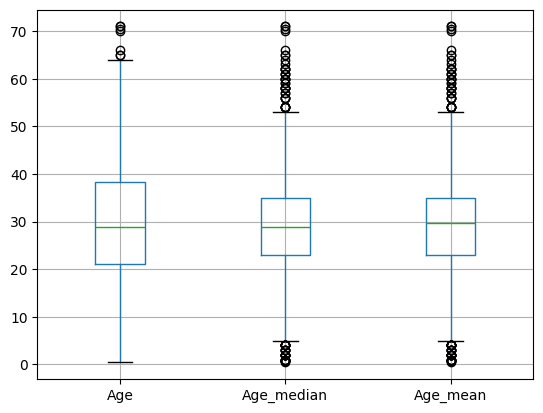

In [68]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

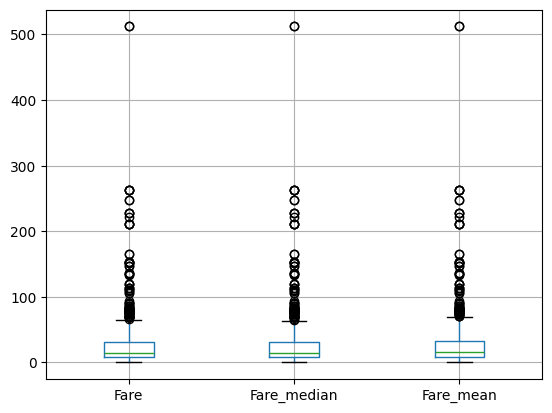

In [69]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

### using sklearn

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
imputer1 = SimpleImputer(strategy='most_frequent')
imputer2 = SimpleImputer(strategy='mean')

trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [72]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [73]:
trf.named_transformers_['imputer1'].statistics_

array([24.])

In [74]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [75]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [76]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 24.    , 221.7792,   0.    ],
       [ 24.    ,  25.925 ,   0.    ]], shape=(712, 3))